In [1]:
import urllib.parse
import urllib.request
import pandas as pd
import re
from tqdm.notebook import tqdm
import numpy as np
import pickle
import os


In [2]:
os.getcwd()
os.chdir("./data/")
os.getcwd()

'/home/hb/python/preprecessing3/data'

# 데이터 살펴보기
[1. Postmod ](#Postmod)  
[2. Phospho.ELM](#PostPho.ELM)  
3. PSEA -> 접속불가  
[4. PhosphoNetworks](#PhosphoNetworks)    
5. HuPHO -> 접속불가
[6. PhosphoPICK](#PhosphoPICK)  
7. RegPhos -> 접속불가    
8. PKIS -> 접속불가  
[9. EPSD](#EPSD)

dfPostMod = pd.read_csv('./PostMod.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPostMod.head()) #실험데이터 2816개
          #
          #PostMod by using Phospho.ELM database
dfPhosphoSitePlus = pd.read_csv('./PhosphoSitePlus.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoSitePlus.head()) #실험데이터

          
dfPhosphoELM = pd.read_csv('./Phospho.ELM.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoELM.head()) #실험데이터


dfPhosphoNetworks = pd.read_csv('./PhosphoNetworks.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoNetworks.head()) #실험데이터 3274개 UniProt와 Uniprot.1이 다르므로 kinase와 substrate로 구분가능할듯 
                  #datasets were generated from a collaborative project of 
                  #Drs. Heng Zhu, Jin Zhang, and Jiang Qian's labs 

dfDEPOD = pd.read_csv('./DEPOD.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfDEPOD.head()) #실험데이터 데이터개수 265개
        
dfPhosphoPICK = pd.read_csv('./PhosphoPICK.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoPICK.head()) #예측 데이터 20209개 substrate에 대한 각각의 kinase별 p-value제공


dfNetworKIN = pd.read_csv('./NetworKIN.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfNetworKIN.head()) #예측데이터 


dfGPS = pd.read_csv('./GPS.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfGPS.head()) #예측데이터
dfEPSD = pd.read_csv('./EPSD.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfEPSD.head())
dfGPSbench = pd.read_excel('./GPS5_benchmarkdata.xlsx',header = 3)
display(dfEPSD.head())        

## Postmod

In [28]:
dfPostMod = pd.read_csv('./PostMod.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPostMod) #실험데이터 2816개
          #
          #PostMod by using Phospho.ELM database
        
dfPostMod.info()


,EPSD ID,UniProt,Position,Kinase,Source
0,EP0001281,O15162,Y69,Abl;Src,Experimental
1,EP0001281,O15162,Y74,Abl;Src,Experimental
2,EP0001340,O15350,Y99,Abl,Experimental
3,EP0006301,P00519,Y393,Abl;Src,Experimental
4,EP0006302,P00520,Y393,Abl,Experimental
...,...,...,...,...,...
2812,EP0009109,P12318,Y288,Fyn;Lyn;Syk;BLK,Experimental
2813,EP0009109,P12318,Y304,Fyn;Lyn;Syk;BLK,Experimental
2814,EP0016960,P51452,Y138,Syk;ZAP70,Experimental
2815,EP0012558,P31995,Y287,Syk,Experimental


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EPSD ID   2817 non-null   object
 1   UniProt   2817 non-null   object
 2   Position  2817 non-null   object
 3   Kinase    2817 non-null   object
 4   Source    2817 non-null   object
dtypes: object(5)
memory usage: 110.2+ KB


In [33]:
dfPostMod['Kinase'] = dfPostMod['Kinase'].apply(lambda x:x.split(';'))
dfPostMod = dfPostMod.explode('Kinase')
dfPostMod


,EPSD ID,UniProt,Position,Kinase,Source
0,EP0001281,O15162,Y69,Abl,Experimental
0,EP0001281,O15162,Y69,Src,Experimental
1,EP0001281,O15162,Y74,Abl,Experimental
1,EP0001281,O15162,Y74,Src,Experimental
2,EP0001340,O15350,Y99,Abl,Experimental
...,...,...,...,...,...
2813,EP0009109,P12318,Y304,BLK,Experimental
2814,EP0016960,P51452,Y138,Syk,Experimental
2814,EP0016960,P51452,Y138,ZAP70,Experimental
2815,EP0012558,P31995,Y287,Syk,Experimental


In [34]:
# EPSD ID = UniPort (substrate) 개수
print(f"substrate 개수", dfPostMod.iloc[:,0].value_counts(),sep='\n', end='\n\n') 

# dfPostMod의 'Kinase'이름의 열에서 고유값의 개수

# Kinase 개수
print(f"kinase 개수", dfPostMod.iloc[:,3].value_counts(),sep='\n', end='\n\n') 

# dfPostMod의 'Kinase'이름의 열에서 고유값의 개수)
print(f"예측값 or 실험값",dfPostMod.iloc[:,4].value_counts(),sep='\n', end='\n\n') 

# dfPostMod의 'Kinase'이름의 열에서 고유값의 개수)

substrate 개수
EP0010961    94
EP0009822    70
EP0025924    63
EP0008942    58
EP0009427    55
             ..
EP0021038     1
EP0009765     1
EP0012898     1
EP0015705     1
EP0018795     1
Name: EPSD ID, Length: 982, dtype: int64

kinase 개수
PKA_group           313
CK2_group           273
PKC_group           232
Src                 182
MAPK1               181
                   ... 
PKG1A/cGK-Ialpha      1
PAK3                  1
MARK_group            1
MAP3K_group           1
PYK2                  1
Name: Kinase, Length: 156, dtype: int64

예측값 or 실험값
Experimental    4458
Name: Source, dtype: int64



## Phospho.ELM 
http://phospho.elm.eu.org/dataset.html

Phospho.ELM version 9.0 contains 8,718 substrate proteins covering 3,370 tyrosine, 31,754 serine and 7,449 threonine instances (including data from high-throughput experiments).

The entries, manually annotated and based on scientific literature, provide information about the phosphorylated proteins and the exact position of known phosphorylated instances, the kinases responsible for the modification and links to bibliographic references. Additional information is also given about structure, interaction partners and sub-cellular compartment and tissue specificities when available.

The data set that we provide you with includes:

- UniPROT/Ensembl accession number
- sequence
- position
- phosphorylated residue
- PubMed Id
- the upstream kinase (when known)
- source (High-ThroughPut/Low-ThroughPut)
- species
- entry date

In [45]:
dfPhosphoELM = pd.read_csv('./Phospho.ELM.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoELM) #실험데이터

        
dfPhosphoELM.info()

# EPSD ID = UniPort (substrate) 개수
print(f"substrate 개수", dfPhosphoELM.iloc[:,0].value_counts(),sep='\n', end='\n\n') 
# Kinase 개수
print(f"kinase 개수", dfPhosphoELM.iloc[:,3].value_counts(),sep='\n', end='\n\n') 
# Experimental or predicted?
print(f"예측값 or 실험값",dfPhosphoELM.iloc[:,4].value_counts(),sep='\n', end='\n\n') 


,EPSD ID,UniProt,Position,Kinase,Source
0,EP0000453,O08605,S39,PAK2,Experimental
1,EP0000453,O08605,T34,PAK2,Experimental
2,EP0001071,O14543,Y204,Lck,Experimental
3,EP0001071,O14543,Y221,Lck,Experimental
4,EP0001136,O14746,S824,PKB_group,Experimental
...,...,...,...,...,...
4490,EP0021815,Q03720,S978,PKA_group_drome,Experimental
4491,EP0021815,Q03720,S978,PKA_group_drome,Experimental
4492,EP0061572,Q8IPH9,S54,Pka-C1_drome,Experimental
4493,EP0061572,Q8IPH9,S54,Pka-C1_drome,Experimental


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EPSD ID   4495 non-null   object
 1   UniProt   4495 non-null   object
 2   Position  4495 non-null   object
 3   Kinase    4495 non-null   object
 4   Source    4495 non-null   object
dtypes: object(5)
memory usage: 175.7+ KB
substrate 개수
EP0009497    31
EP0023072    30
EP0006939    29
EP0013515    25
EP0025924    25
             ..
EP0030870     1
EP0006005     1
EP0007290     1
EP0089755     1
EP0015670     1
Name: EPSD ID, Length: 1251, dtype: int64

kinase 개수
PKA_group      297
PKC_group      213
CK2_group      206
PKC_alpha      163
CDK1           159
              ... 
NDR1             1
LRRK2            1
MST3             1
SIK              1
LIMK1_drome      1
Name: Kinase, Length: 284, dtype: int64

예측값 or 실험값
Experimental    4495
Name: Source, dtype: int64



In [3]:
# PhosphoNetworks
print(os.getcwd())
rawKSI = pd.read_csv('./phosphonetworks/rawKSI.csv',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
rawKSI_ = rawKSI.head(5).style.set_caption("rawKSI")
display(rawKSI_)

refKSI = pd.read_csv('./phosphonetworks/refKSI.csv',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
refKSI_ = refKSI.head(5).style.set_caption("refKSI")
display(refKSI_)

comKSI = pd.read_csv('./phosphonetworks/comKSI.csv',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
comKSI_ = comKSI.head(5).style.set_caption("comKSI")
display(comKSI_)

highResolutionNetwork = pd.read_csv('./phosphonetworks/highResolutionNetwork.csv',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
highResolutionNetwork_ = highResolutionNetwork.head(5).style.set_caption("highResolutionNetwork")
display(highResolutionNetwork_)

/home/hb/python/preprecessing3/data


,kinase,substrate
0,AAK1,CNOT10
1,AAK1,CSDE1
2,AAK1,CSRP3
3,AAK1,DDEFL1
4,AAK1,EIF2AK2


,kinase,substrate
0,AAK1,SOX2
1,ABL2,CBL
2,ABL2,HLCS
3,ACVR1,DNAJB2
4,ACVR1,E2F3


,Kinase,Substrate,Score
0,AAK1,SOX2,1.79
1,ABL2,CAT,100
2,ABL2,CBL,46.65
3,ABL2,GPX1,100
4,ABL2,HLCS,1.67


,,,>ABCA1
SSYGISETTLEEIFL,T1242,CSNK2A1,1.016200
SYGISETTLEEIFLK,T1243,CSNK2A1,1.045500
IDPESRETDLLSGMD,T1305,CSNK2A1,1.026300
>ABI2,nan,nan,nan
PPTQKPPSPPMSGKG,S177,CDK5,2.098700


In [4]:


dfDEPOD = pd.read_csv('./DEPOD.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfDEPOD.head()) #실험데이터 데이터개수 265개
        


dfNetworKIN = pd.read_csv('./NetworKIN.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfNetworKIN.head()) #예측데이터 


dfGPS = pd.read_csv('./GPS.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfGPS.head()) #예측데이터
dfEPSD = pd.read_csv('./EPSD.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfEPSD.head())
dfGPSbench = pd.read_excel('./GPS5_benchmarkdata.xlsx',header = 3)
display(dfEPSD.head())        

,EPSD ID,UniProt,Position,Kinase,Source
0,EP0021246,Q01986,S298,PAK2,Experimental
1,EP0087333,Q9WTQ1,S203,PAK2,Experimental
2,EP0006440,P01237,S206,PAK2,Experimental
3,EP0007082,P05198,S52,HRI,Experimental
4,EP0007082,P05198,S49,HRI,Experimental


,EPSD ID,UniProt,Position,Kinase,Source
0,EP0001281,O15162,Y69,Abl;Src,Experimental
1,EP0001281,O15162,Y74,Abl;Src,Experimental
2,EP0001340,O15350,Y99,Abl,Experimental
3,EP0006301,P00519,Y393,Abl;Src,Experimental
4,EP0006302,P00520,Y393,Abl,Experimental


,EPSD ID,UniProt,Position,Kinase,Source
0,EP0000453,O08605,S39,PAK2,Experimental
1,EP0000453,O08605,T34,PAK2,Experimental
2,EP0001071,O14543,Y204,Lck,Experimental
3,EP0001071,O14543,Y221,Lck,Experimental
4,EP0001136,O14746,S824,PKB_group,Experimental


,EPSD ID,UniProt,UniProt.1,Gene name,Source
0,EP0016266,P48431,Q2M2I8,AAK1,Experimental
1,EP0010961,P22681,P42684,ABL2,Experimental
2,EP0016873,P50747,P42684,ABL2,Experimental
3,EP0011533,P25686,Q04771,ACVR1,Experimental
4,EP0000163,O00716,Q04771,ACVR1,Experimental


,EPSD ID,UniProt,Position,Phosphatase,Source
0,EP0006932,P04626,NaN,ACPP,Experimental
1,EP0017167,P52333,NaN,CD45,Experimental
2,EP0012155,P29597,1054,CD45,Experimental
3,EP0012155,P29597,1055,CD45,Experimental
4,EP0057392,Q86WV1,232,CD45,Experimental


,EPSD ID,UniProt,Kinase,p-value,Source
0,EP0012552,P31946,JNK1,0.010188,Predicted
1,EP0012552,P31946,CDK7,0.018099,Predicted
2,EP0012552,P31946,GSK3A,0.044990,Predicted
3,EP0012552,P31946,DYRK1A,0.021773,Predicted
4,EP0012552,P31946,CDK9,0.032500,Predicted


,EPSD ID,UniProt,Position,Kinase,NetworKIN score,Tree,Group,NetPhorest score,STRING identifier,STRING score,Substrate name,Sequence,STRING path,Source
0,EP0080070,Q9NQ94,Y401,Abl2,0.9937,SH2,Abl_group,0.0713,ENSP00000282641,0.0930,A1CF,LGGRGyLAYTG,"ENSP00000356595, 0.192 ENSP00000316333, 0.64 E...",Predicted
1,EP0080070,Q9NQ94,Y401,BLK,1.1800,SH2,Src_group,0.1525,ENSP00000282641,0.1342,A1CF,LGGRGyLAYTG,"ENSP00000259089, 0.7248 ENSP00000363115, 0.627...",Predicted
2,EP0080070,Q9NQ94,Y401,BMX,1.0033,SH2,Tec_group,0.0754,ENSP00000282641,0.1076,A1CF,LGGRGyLAYTG,"ENSP00000308774, 0.7792 ENSP00000300086, 0.401...",Predicted
3,EP0080070,Q9NQ94,Y401,BTK,1.0033,SH2,Tec_group,0.0754,ENSP00000282641,0.1346,A1CF,LGGRGyLAYTG,"ENSP00000308176, 0.7248 ENSP00000363115, 0.627...",Predicted
4,EP0080070,Q9NQ94,Y401,Brk,0.9864,SH2,Brk,0.0680,ENSP00000282641,0.1041,A1CF,LGGRGyLAYTG,"ENSP00000217185, 0.4264 ENSP00000313829, 0.688...",Predicted


,EPSD ID,UniProt,Position,Kinase,Peptide,Score,Cutoff,Source
0,EP0168130,F4HRS2,S2059,CK1,EPDLPGRSSIQDDES,8.194,5.872,Predicted
1,EP0168130,F4HRS2,S2060,TKL,PDLPGRSSIQDDESN,4.606,4.354,Predicted
2,EP0168130,F4HRS2,S2060,TKL,PDLPGRSSIQDDESN,4.606,4.354,Predicted
3,EP0168130,F4HRS2,S2060,AGC/PKA,PDLPGRSSIQDDESN,4.866,4.418,Predicted
4,EP0168130,F4HRS2,S2047,Atypical/TAF1,GSESKTESVAEEEPD,4.750,4.681,Predicted


,EPSD ID,UniProt ID,AA,Position,Source,Reference
0,EP0096278,A0A021WW64,S,159,Exp.,27794539
1,EP0096278,A0A021WW64,S,173,Exp.,27794539; 21082442; 19060867; 30418626
2,EP0096278,A0A021WW64,T,201,Exp.,19429919; 21082442; 21081558; 19060867; 228179...
3,EP0096278,A0A021WW64,S,207,Exp.,19060867; 30418626; 21082442
4,EP0096279,A0A023GPV6,S,5,Exp.,27794539


,EPSD ID,UniProt ID,AA,Position,Source,Reference
0,EP0096278,A0A021WW64,S,159,Exp.,27794539
1,EP0096278,A0A021WW64,S,173,Exp.,27794539; 21082442; 19060867; 30418626
2,EP0096278,A0A021WW64,T,201,Exp.,19429919; 21082442; 21081558; 19060867; 228179...
3,EP0096278,A0A021WW64,S,207,Exp.,19060867; 30418626; 21082442
4,EP0096279,A0A023GPV6,S,5,Exp.,27794539


### dfPosphoPICK
http://bioinf.scmb.uq.edu.au/phosphopick/download

In [21]:
dfPhosphoPICK = pd.read_csv('./PhosphoPICK.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoPICK) #예측 데이터 20209개 substrate에 대한 각각의 kinase별 p-value제공

dfPhosphoPICK.info()

,EPSD ID,UniProt,Kinase,p-value,Source
0,EP0012552,P31946,JNK1,0.010188,Predicted
1,EP0012552,P31946,CDK7,0.018099,Predicted
2,EP0012552,P31946,GSK3A,0.044990,Predicted
3,EP0012552,P31946,DYRK1A,0.021773,Predicted
4,EP0012552,P31946,CDK9,0.032500,Predicted
...,...,...,...,...,...
244954,EP0025550,Q12436,IPL1,0.009484,Predicted
244955,EP0013117,P34240,TPK1,0.028453,Predicted
244956,EP0013117,P34240,TPK3,0.018820,Predicted
244957,EP0013117,P34240,IPL1,0.009484,Predicted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244959 entries, 0 to 244958
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   EPSD ID  244959 non-null  object 
 1   UniProt  244959 non-null  object 
 2   Kinase   244959 non-null  object 
 3   p-value  244959 non-null  float64
 4   Source   244959 non-null  object 
dtypes: float64(1), object(4)
memory usage: 9.3+ MB


In [44]:
# EPSD ID = UniPort (substrate) 개수
print(f"substrate 개수", dfPhosphoPICK.iloc[:,0].value_counts(),sep='\n', end='\n\n') 

# dfPostMod의 'Kinase'이름의 열에서 고유값의 개수

# Kinase 개수
print(f"kinase 개수", dfPhosphoPICK.iloc[:,2].value_counts(),sep='\n', end='\n\n') 

print(f"예측값 or 실험값",dfPhosphoPICK.iloc[:,4].value_counts(),sep='\n', end='\n\n') 

substrate 개수
EP0006301    87
EP0006717    86
EP0006306    85
EP0007533    84
EP0012534    84
             ..
EP0073999     1
EP0073393     1
EP0031130     1
EP0030911     1
EP0012735     1
Name: EPSD ID, Length: 38428, dtype: int64

kinase 개수
NEK2    24047
Hck     24047
IPL1     4967
ERK2     2715
Src      2708
        ...  
PKH2      298
HOG1      298
FUS3      295
SLT2      294
FRK1      291
Name: Kinase, Length: 133, dtype: int64

예측값 or 실험값
Predicted    244959
Name: Source, dtype: int64



## PostPho.ELM


In [50]:
dfPostMod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EPSD ID   2817 non-null   object
 1   UniProt   2817 non-null   object
 2   Position  2817 non-null   object
 3   Kinase    2817 non-null   object
 4   Source    2817 non-null   object
dtypes: object(5)
memory usage: 110.2+ KB


In [67]:
dfPostMod['Kinase'].value_counts()

PKA_group                 182
PKC_group                 130
CK2_group                 124
CDK1                       98
CK2_group;CK2 alpha        96
                         ... 
mTOR;PDK-1                  1
PAK1;MAP2K_group            1
PAK1;PAK3;PAK_group         1
MAPK_group;GSK-3_group      1
PAK1;ROCK1                  1
Name: Kinase, Length: 349, dtype: int64

In [77]:
dfPostMod

,EPSD ID,UniProt,Position,Kinase,Source
0,EP0001281,O15162,Y69,Abl;Src,Experimental
1,EP0001281,O15162,Y74,Abl;Src,Experimental
2,EP0001340,O15350,Y99,Abl,Experimental
3,EP0006301,P00519,Y393,Abl;Src,Experimental
4,EP0006302,P00520,Y393,Abl,Experimental
...,...,...,...,...,...
2812,EP0009109,P12318,Y288,Fyn;Lyn;Syk;BLK,Experimental
2813,EP0009109,P12318,Y304,Fyn;Lyn;Syk;BLK,Experimental
2814,EP0016960,P51452,Y138,Syk;ZAP70,Experimental
2815,EP0012558,P31995,Y287,Syk,Experimental


In [79]:
dfPostModd = dfPostMod[dfPostMod['Kinase'].str.contains(';')] 
dfPostModd

,EPSD ID,UniProt,Position,Kinase,Source
0,EP0001281,O15162,Y69,Abl;Src,Experimental
1,EP0001281,O15162,Y74,Abl;Src,Experimental
3,EP0006301,P00519,Y393,Abl;Src,Experimental
5,EP0006835,P04083,Y21,Abl;Src;EGFR,Experimental
8,EP0010961,P22681,Y700,Fyn;Lck;Abl;Syk;Yes;InsR,Experimental
...,...,...,...,...,...
2803,EP0009464,P14317,Y397,Lyn;Syk;Fgr,Experimental
2811,EP0009109,P12318,Y281,Fyn;Lyn;Syk;BLK,Experimental
2812,EP0009109,P12318,Y288,Fyn;Lyn;Syk;BLK,Experimental
2813,EP0009109,P12318,Y304,Fyn;Lyn;Syk;BLK,Experimental


### dfPostMod

In [88]:
dfPostMod['Kinase'] = dfPostMod['Kinase'].apply(lambda x:x.split(';'))
dfPostMod = dfPostMod.explode('Kinase')
dfPostMod


,EPSD ID,UniProt,Position,Kinase,Source,Kinase_list
0,EP0001281,O15162,Y69,Abl,Experimental,"[Abl, Src]"
0,EP0001281,O15162,Y69,Src,Experimental,"[Abl, Src]"
1,EP0001281,O15162,Y74,Abl,Experimental,"[Abl, Src]"
1,EP0001281,O15162,Y74,Src,Experimental,"[Abl, Src]"
2,EP0001340,O15350,Y99,Abl,Experimental,[Abl]
...,...,...,...,...,...,...
2813,EP0009109,P12318,Y304,BLK,Experimental,"[Fyn, Lyn, Syk, BLK]"
2814,EP0016960,P51452,Y138,Syk,Experimental,"[Syk, ZAP70]"
2814,EP0016960,P51452,Y138,ZAP70,Experimental,"[Syk, ZAP70]"
2815,EP0012558,P31995,Y287,Syk,Experimental,[Syk]


In [91]:
dfPostMod.count()

EPSD ID        4458
UniProt        4458
Position       4458
Kinase         4458
Source         4458
Kinase_list    4458
dtype: int64

In [103]:
dfPostMod.iloc[:,[1]].value_counts()

UniProt
P22681     94
P16220     70
Q13480     63
P11388     58
P14136     55
           ..
Q05655      1
P31751      1
P31938      1
P31947      1
Q9Z266      1
Length: 982, dtype: int64

In [102]:
dfPostMod.iloc[:,[3]].value_counts()

Kinase         
PKA_group          313
CK2_group          273
PKC_group          232
Src                182
MAPK1              181
                  ... 
PYK2                 1
PLK3                 1
PAK2                 1
PKG1B/cGK-Ibeta      1
NuaK1                1
Length: 156, dtype: int64

## PhosphoNetworks

In [42]:
dfPhosphoNetworks = pd.read_csv('./PhosphoNetworks.txt',encoding = 'ISO-8859-1', header = 0, delimiter = '\t')
display(dfPhosphoNetworks) #실험데이터 3274개 UniProt와 Uniprot.1이 다르므로 kinase와 substrate로 구분가능할듯 
                  #datasets were generated from a collaborative project of 
                  #Drs. Heng Zhu, Jin Zhang, and Jiang Qian's labs 
        
dfPhosphoNetworks.info()

,EPSD ID,UniProt,UniProt.1,Gene name,Source
0,EP0016266,P48431,Q2M2I8,AAK1,Experimental
1,EP0010961,P22681,P42684,ABL2,Experimental
2,EP0016873,P50747,P42684,ABL2,Experimental
3,EP0011533,P25686,Q04771,ACVR1,Experimental
4,EP0000163,O00716,Q04771,ACVR1,Experimental
...,...,...,...,...,...
3270,EP0080350,Q9NUK0,P43403,ZAP70,Experimental
3271,EP0025861,Q13330,P43403,ZAP70,Experimental
3272,EP0010066,P17612,P43403,ZAP70,Experimental
3273,EP0050502,Q6PIZ9,P43403,ZAP70,Experimental


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EPSD ID    3275 non-null   object
 1   UniProt    3275 non-null   object
 2   UniProt.1  3275 non-null   object
 3   Gene name  3275 non-null   object
 4   Source     3275 non-null   object
dtypes: object(5)
memory usage: 128.1+ KB


In [43]:
# EPSD ID = UniPort (substrate) 개수
print(f"substrate 개수", dfPostMod.iloc[:,0].value_counts(),sep='\n', end='\n\n') 

# dfPostMod의 'Kinase'이름의 열에서 고유값의 개수

# Kinase 개수
print(f"kinase 개수", dfPostMod.iloc[:,3].value_counts(),sep='\n', end='\n\n') 

# 실험 Or 예측?
print(f"예측값 or 실험값",dfPostMod.iloc[:,4].value_counts(),sep='\n', end='\n\n') 



substrate 개수
EP0010961    94
EP0009822    70
EP0025924    63
EP0008942    58
EP0009427    55
             ..
EP0021038     1
EP0009765     1
EP0012898     1
EP0015705     1
EP0018795     1
Name: EPSD ID, Length: 982, dtype: int64

kinase 개수
PKA_group           313
CK2_group           273
PKC_group           232
Src                 182
MAPK1               181
                   ... 
PKG1A/cGK-Ialpha      1
PAK3                  1
MARK_group            1
MAP3K_group           1
PYK2                  1
Name: Kinase, Length: 156, dtype: int64

예측값 or 실험값
Experimental    4458
Name: Source, dtype: int64



In [2]:
import os
import pandas as pd
os.getcwd()

'/home/hb/python/pp_prediction/preprocessing'

In [3]:
hash_data = pd.read_csv(os.getcwd() + '/data/Calpha.txt', sep='\t')

hash_data

,Unnamed: 0,L,F,I,M,V,W,C,Y,H,...,T,G,P,R,Q,S,N,E,D,K
0,L,-0.274,-0.092,-0.181,-0.116,-0.214,-0.051,-0.164,-0.142,-0.012,...,0.028,0.092,0.245,-0.092,-0.077,0.020,0.139,0.016,0.169,0.043
1,F,-0.092,-0.260,-0.126,-0.153,-0.149,-0.151,-0.272,-0.191,-0.059,...,-0.033,-0.019,0.139,0.060,0.054,-0.076,0.039,0.128,0.150,0.024
2,I,-0.181,-0.126,-0.333,-0.188,-0.292,0.007,-0.266,-0.172,-0.027,...,-0.050,0.046,0.319,0.035,0.009,-0.025,0.043,0.049,0.123,-0.014
3,M,-0.116,-0.153,-0.188,-0.617,-0.206,-0.124,-0.371,-0.177,-0.079,...,-0.075,-0.034,0.179,0.007,-0.041,0.000,0.080,0.036,0.136,0.121
4,V,-0.214,-0.149,-0.292,-0.206,-0.404,-0.135,-0.239,-0.153,-0.010,...,-0.062,-0.036,0.197,-0.035,0.043,0.021,0.139,0.096,0.148,0.057
5,W,-0.051,-0.151,0.007,-0.124,-0.135,-0.416,-0.260,-0.253,-0.132,...,0.017,-0.034,0.110,-0.111,-0.053,-0.004,0.028,0.058,0.167,0.017
6,C,-0.164,-0.272,-0.266,-0.371,-0.239,-0.260,-2.066,-0.315,-0.192,...,-0.108,-0.207,0.018,0.001,-0.036,-0.191,-0.038,0.202,0.097,0.156
7,Y,-0.142,-0.191,-0.172,-0.177,-0.153,-0.253,-0.315,-0.238,-0.062,...,-0.027,0.019,0.121,-0.060,-0.003,-0.023,-0.003,0.145,0.165,-0.013
8,H,-0.012,-0.059,-0.027,-0.079,-0.010,-0.132,-0.192,-0.062,-0.400,...,-0.026,-0.006,0.192,0.038,0.121,0.032,0.133,0.232,0.083,0.373
9,A,-0.263,-0.109,-0.211,-0.207,-0.310,-0.056,-0.187,-0.117,-0.032,...,-0.050,-0.105,0.139,-0.128,-0.070,-0.031,0.046,-0.012,0.073,0.075


In [5]:
hash_data.iloc[1,1].shape

()

In [9]:
import pyhmmer
os.getcwd()

'/home/hb/python/pp_prediction/preprocessing'

In [12]:
with pyhmmer.plan7.HMMFile("/home/hb/python/pp_prediction/HMM/Pkinase.hmm") as hmm_file:
    hmm = next(hmm_file)
with pyhmmer.easel.SequenceFile("/home/hb/python/pp_prediction/HMM/uniprot_sprot.fasta") as seq_file:
    alphabet = seq_file.guess_alphabet()
    
builder = pyhmmer.plan7.Builder(alphabet)
background = pyhmmer.plan7.Background(alphabet)
pipeline = pyhmmer.plan7.Pipeline(alphabet, background=background)

# 기존코드 : pyhmmer 0.5.0에서 사라진 parameter : • Unused report_e parameter of pyhmmer.plan7.Pipeline constructor.
# pipeline = pyhmmer.plan7.Pipeline(alphabet, background=background, report_e=1e-5)


In [14]:
seq_file

In [13]:
with pyhmmer.easel.SequenceFile("/home/hb/python/pp_prediction/HMM/uniprot_sprot.fasta") as seq_file:
    seq_file.set_digital(alphabet)
    hits = pipeline.search_hmm(query=hmm, sequences=seq_file)
len(hits)

TypeError: `sequences` cannot be an iterator, expected an iterable

In [11]:
ali = hits[0].domains[1].alignment

print(" "*3, ali.target_name.decode())
print("{:3}".format(ali.hmm_from), ali.hmm_sequence, "{:3}".format(ali.hmm_to))
print(" "*3, ali.identity_sequence)
print("{:3}".format(ali.target_from), ali.target_sequence, "{:3}".format(ali.target_to))
print(" "*3, ali.hmm_name.decode())

    sp|Q63531|KS6A1_RAT
  1 yekleklGeGsfGkVykaveketgkivAvKkikkekakkkkekkvlrEikilkklk.hpnivrlyevfeekdelylvleyveggeladllerkgslseeeakkiakqilegleylHsegvvHrDlKpeNiLid.ekge...lKitDFGlakelesssk.ltsfvgtseYlAPEvlkeneyskkvDvWslGvilyelltgkppfsgekgkekvekeldqlekilkilg.etkeklpeakeiseeakdllkkllkkdpkkRltaeellqhpyl 264
    y ++e++G Gs++++ ++v+k+t+ ++AvK+i+k+k++ ++      Ei+il ++  hpni++l++v+ +++++ylv+e+++ggel d + r++ +se+ea++++++i + +eylHs+gvvHrDlKp+NiL+  e+g+   l+i+DFG+ak+l+ ++  l++ + t +++APEvlk+++y++ +D+WslGv+ly++l+g +pf++  +++  e++l++      i+  + +++  +++++se+akdl++k+l++dp++Rlta+++lqhp++
418 YIVKETIGVGSYSVCKRCVHKATNMEYAVKVIDKSKRDPSE------EIEILLRYGqHPNIITLKDVYDDSKHVYLVTELMRGGELLDKILRQKFFSEREASFVLYTISKTVEYLHSQGVVHRDLKPSNILYVdESGNpecLRICDFGFAKQLRAENGlLMTPCYTANFVAPEVLKRQGYDEGCDIWSLGVLLYTMLAGYTPFANGPSDT-PEEILTR------ISSgKFTLSGGNWNTVSETAKDLVSKMLHVDPHQRLTAKQVLQHPWI 675
    Pkinase


In [8]:
hits[486].domains[0]

In [62]:
ali = hits[486].domains[0].alignment
print(" "*3, ali.target_name.decode())

    sp|Q2RAV0|CDPKP_ORYSJ


In [63]:
with pyhmmer.plan7.HMMFile("Pkinase.hmm") as hmm_file:
    hmm = next(hmm_file)

In [64]:
with pyhmmer.easel.SequenceFile("uniprot_sprot.fasta") as seq_file:
    seq_file.set_digital(hmm.alphabet)
    sequences = list(seq_file)

In [65]:
pipeline = pyhmmer.plan7.Pipeline(hmm.alphabet)
hits = pipeline.search_hmm(hmm, sequences)

In [11]:
#len(hits)

In [66]:
alisum = []
alisum2 = []
for i in range(4427):
    try:
        for n in range(50):
            ali = hits[i].domains[n].alignment
            alisum.append(ali)
    except IndexError:
        continue

In [148]:
#print(len(alisum))
#print(alisum[250].target_name.decode())
#print("{:3}".format(alisum[601].target_from), alisum[601].target_sequence, "{:3}".format(alisum[601].target_to))

5466
sp|Q15746|MYLK_HUMAN
  4 FQKVEKIGEGTYGVVYKAKNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQD-LKKFMDasALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINAEGSIKLADFGLARAFGVPVRtYTHEVVTLWYRAPEILlGCKYYSTAVDIWSLGCIFAEMHLV 199


In [68]:
hmmID =[]
for n in range(5466):
    alitemp = alisum[n].target_name.decode()
    hmmID.append(alitemp[alitemp.rfind('sp|')+3:alitemp.rfind('|',5)])

In [69]:
hmmID[5253]

'Q9LJR3'

In [70]:
problems = []
for n in hmmID:
    if n.startswith('Y') == True:
        problems.append(n)
    else:
        continue
problems

[]

In [71]:
hmmspecies = []
for n in range(5466):
    alitemp = alisum[n].target_name.decode()
    hmmspecies.append(alitemp[alitemp.rfind('_',)+1:])

In [72]:
hmmspecies

['RAT',
 'RAT',
 'HUMAN',
 'HUMAN',
 'CHICK',
 'CHICK',
 'MOUSE',
 'MOUSE',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'MOUSE',
 'MOUSE',
 'XENLA',
 'XENLA',
 'HUMAN',
 'HUMAN',
 'MOUSE',
 'MOUSE',
 'PONAB',
 'PONAB',
 'HUMAN',
 'HUMAN',
 'DANRE',
 'DANRE',
 'CAEEL',
 'CAEEL',
 'CHICK',
 'CHICK',
 'MOUSE',
 'MOUSE',
 'MOUSE',
 'MOUSE',
 'MOUSE',
 'XENLA',
 'XENLA',
 'CAEEL',
 'CAEEL',
 'MOUSE',
 'MOUSE',
 'HUMAN',
 'HUMAN',
 'DANRE',
 'DANRE',
 'DROME',
 'DROME',
 'MIMIV',
 'MIMIV',
 'MIMIV',
 'MIMIV',
 'MIMIV',
 'MIMIV',
 'HUMAN',
 'HUMAN',
 'RAT',
 'RAT',
 'HUMAN',
 'HUMAN',
 'MOUSE',
 'MOUSE',
 'MOUSE',
 'MOUSE',
 'DROME',
 'DROME',
 'DICDI',
 'DICDI',
 'DICDI',
 'YEAST',
 'DICDI',
 'HUMAN',
 'DICDI',
 'DICDI',
 'MOUSE',
 'ARATH',
 'DANRE',
 'RAT',
 'MOUSE',
 'DICDI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'ORYSJ',
 'HUMAN',
 'MOUSE',
 'ARATH',
 'OXYRB',
 'PLAF7',
 'PLAFK',
 'ANTMA',
 'YEAST',
 'YEAST',
 'ORYSJ',
 'MAIZE',
 'RAT',
 'RAT',
 'RAT',
 'YEAST',
 'MOUSE',
 'TRYBB',
 'YEAST',
 'YEAS

In [21]:
 #load data
with open('./Database/mappingdict(KIN_ACC_ID)fasta.pickle', 'rb') as fr:
    mappingdict = pickle.load(fr)

In [34]:
print(hmmID[5465])
print(alisum[5465].target_from-1)
print(alisum[5465].target_to-1)

P14872
539
587


In [35]:
mappingdict['P14872']

'MKWITLICLLISSSFIESRILFKRDTDADHHKHIADVYTALTERTFKGLTLAIVSQNLQKCSLEELSKLVNEINDFAKSCINDKTPECEKPVGTLFFDKLCADPAVGVNYEWSKECCAKQDPERAQCFKAHRDHEHTSIKPEPEETCKLLKEHPDDLLSAFIHEEARNHPDLYPPAVLALTKQYHKLAEHCCEEEDKEKCFSEKMKQLMKQSHSIEDKQHHFCWILDNFPEKVLKALNLARVSHRYPKAEFKLAHNFTEEVTHFIKDCCHDDMFECMTERLELTEHTCQHKDELSSKLEKCCNIPLLERTYCIVTLENDDVPAELSQPITEFTEDPHVCEKYAENNEVFLGRYLHAVSRKHQELSEQFLLQSAKEYESLLNKCCKTDNPPECYKDGADRFMNEAKERFAYLKQNCDILHEHGEYLFENELLIRYTKKMPQVSDETLIGIAHQMADIGEHCCAVPENQRMPCAEGDLTILIGKMCERQKKTFINNHVAHCCTDSYSGMRSCFTALGPDEDYVPPPVTDDTFHFDDKICTANDKEKQHIKQKFLVKLIKVSPKLEKNHIDECSAEFLKMVQKCCTADEHQPCFDTEKPVLIEHCQKLHP'

In [22]:
hmmseq = []
for n in range(5466):
    hmmseq.append(mappingdict[hmmID[n]][alisum[n].target_from-1:alisum[n].target_to-1])

In [33]:
mappingdict[hmmID[5465]][alisum[5465].target_from-1:alisum[5465].target_to-1]

'NDKEKQHIKQKFLVKLIKVSPKLEKNHIDECSAEFLKMVQKCCTADEH'

In [36]:
dfhmm = pd.DataFrame({'KIN_ACC_ID':hmmID,'seq':hmmseq,'species':hmmspecies})
dfhmm

,KIN_ACC_ID,seq,species
0,Q63531,FELLKVLGQGSFGKVFLVRKVTRPDNGHLYAMKVLKKATLKVRDRV...,RAT
1,Q63531,YIVKETIGVGSYSVCKRCVHKATNMEYAVKVIDKSKRDPSEEIEIL...,RAT
2,Q15418,FELLKVLGQGSFGKVFLVRKVTRPDSGHLYAMKVLKKATLKVRDRV...,HUMAN
3,Q15418,YVVKETIGVGSYSECKRCVHKATNMEYAVKVIDKSKRDPSEEIEIL...,HUMAN
4,P18652,FELLKVLGQGSFGKVFLVRKITPPDSNHLYAMKVLKKATLKVRDRV...,CHICK
...,...,...,...
5461,Q6GZR8,SGLYQTFAAAAAAHSVGVVHSDLHTGNVML,FRG3G
5462,P14872,TLAIVSQNLQKCSLEELSKLVNEINDFAKSCIN,XENLA
5463,P14872,NLARVSHRYPKAEFKLAHNFTEEVTHFIKDCCHDDMFECM,XENLA
5464,P14872,QELSEQFLLQSAKEYESLLNKCCKT,XENLA


In [37]:
dfhmm['len'] = dfhmm['seq'].apply(lambda x:len(x))

In [38]:
dftodrop = dfhmm[dfhmm['len']==0].index

In [39]:
dfhmm = dfhmm.drop(dftodrop)

In [40]:
dfhmm

,KIN_ACC_ID,seq,species,len
0,Q63531,FELLKVLGQGSFGKVFLVRKVTRPDNGHLYAMKVLKKATLKVRDRV...,RAT,258
1,Q63531,YIVKETIGVGSYSVCKRCVHKATNMEYAVKVIDKSKRDPSEEIEIL...,RAT,257
2,Q15418,FELLKVLGQGSFGKVFLVRKVTRPDSGHLYAMKVLKKATLKVRDRV...,HUMAN,258
3,Q15418,YVVKETIGVGSYSECKRCVHKATNMEYAVKVIDKSKRDPSEEIEIL...,HUMAN,257
4,P18652,FELLKVLGQGSFGKVFLVRKITPPDSNHLYAMKVLKKATLKVRDRV...,CHICK,258
...,...,...,...,...
5461,Q6GZR8,SGLYQTFAAAAAAHSVGVVHSDLHTGNVML,FRG3G,30
5462,P14872,TLAIVSQNLQKCSLEELSKLVNEINDFAKSCIN,XENLA,33
5463,P14872,NLARVSHRYPKAEFKLAHNFTEEVTHFIKDCCHDDMFECM,XENLA,40
5464,P14872,QELSEQFLLQSAKEYESLLNKCCKT,XENLA,25


In [41]:
dfhmm = dfhmm.drop_duplicates(subset=['KIN_ACC_ID'],keep =False)

In [42]:
dfhmm

,KIN_ACC_ID,seq,species,len
68,P25341,FEKIRLLGQGDVGKVYLVRERDTNQIFALKVLNKHEMIKRKKIKRV...,YEAST,278
69,Q86AD7,YEFGPEIGRGAFSIVRQGTHKDTGDQVAIKAISKQHVSEADMKRFT...,DICDI,258
70,Q00532,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIAL...,HUMAN,283
73,Q8CEQ0,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKRFLETEDDPVIKKIAL...,MOUSE,283
74,Q38997,YKLGRTLGIGSFGRVKIAEHALTGHKVAIKILNRRKIKNMEMEEKV...,ARATH,252
...,...,...,...,...
5457,Q4URM8,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANC8,32
5458,Q8PBX3,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANCP,32
5459,A1U669,VFRDSFFHADMHPGNIFVDVSNPADPKYIAIDFGIVGTLAPDDQSY...,MARHV,61
5460,Q18KI0,SRCHAVGQHLGRIHNAGFVHGDPTTRNVRVDSAQNYLIDFGLGYHT...,HALWD,64


<AxesSubplot:>

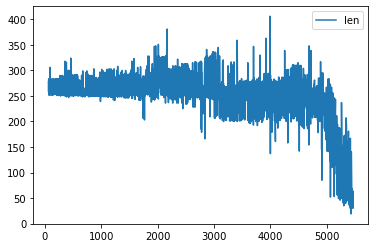

In [43]:
dfhmm.plot()

In [193]:
dfU = pd.read_csv('./1_Pfam_HMM_mapping_v30_Pkinase.txt',encoding = 'ISO-8859-1', header = 1, delimiter = '\t')#정답 데이터
dfU

,!Uniprot_ID,Range,Domain,Matches
0,Q15418,62-320,Pkinase,"[(62, 'F', 1), (63, 'E', 2), (64, 'L', 3), (65..."
1,Q15418,418-675,Pkinase,"[(418, 'Y', 1), (419, 'V', 2), (420, 'V', 3), ..."
2,Q15349,59-318,Pkinase,"[(59, 'F', 1), (60, 'E', 2), (61, 'L', 3), (62..."
3,Q15349,415-672,Pkinase,"[(415, 'Y', 1), (416, 'E', 2), (417, 'I', 3), ..."
4,F2Z2J1,84-343,Pkinase,"[(84, 'F', 1), (85, 'E', 2), (86, 'L', 3), (87..."
...,...,...,...,...
1273,A0A087WYP8,1-57,Pkinase_Tyr,"[(1, 'G', 203), (2, 'E', 204), (3, 'R', 205), ..."
1274,J3QQL4,13-92,Pkinase_Tyr,"[(13, 'P', 182), (14, 'F', 183), (15, 'S', 184..."
1275,Q9H5K3,83-196,Pkinase_Tyr,"[(83, 'Q', 3), (84, 'L', 4), (85, 'K', 5), (86..."
1276,Q5TGY6,263-311,Pkinase_Tyr,"[(263, 'I', 1), (264, 'T', 2), (265, 'L', 3), ..."


In [185]:
#pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [188]:
#pd.set_option('display.max_colwidth',50) pandas 내용다 확인하려면 50을 None으로 기본값50

In [194]:
dfU[dfU['!Uniprot_ID']=='P06493']

,!Uniprot_ID,Range,Domain,Matches
53,P06493,4-287,Pkinase,"[(4, 'Y', 1), (5, 'T', 2), (6, 'K', 3), (7, 'I..."


In [195]:
dfhmm[dfhmm['KIN_ACC_ID']=='P68400']

,KIN_ACC_ID,seq,species,len
745,P68400,YQLVRKLGRGKYSEVFEAINITNNEKVVVKILKPVKKKKIKREIKI...,HUMAN,285


In [15]:
os.getcwd()

'/home/hb/python/pp_prediction/preprocessing'

In [ ]:
pp_prediction/Kinase_Substrate_Dataset

In [17]:
df1

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#
0,Dyrk2,DYRK2,Q5U4C9,mouse,NDEL1,83431.0,Q9ERR1,Ndel1,mouse,S336,1869686801,LGSsRPSsAPGMLPL,NaN,,X,NaN
1,Pak2,PAK2,Q64303,rat,MEK1,170851.0,Q01986,Map2k1,rat,S298,448284,RtPGRPLsSYGMDSR,Pkinase,,X,9128; 98195
2,Pak2,PAK2,Q64303,rat,PRKD1,85421.0,Q9WTQ1,Prkd1,rat,S203,449896,GVRRRRLsNVsLTGL,NaN,X,,NaN
3,Pak2,PAK2,Q64303,rat,prolactin,24683.0,P01237,Prl,rat,S206,451732,IRCLRRDsHKVDNYL,Hormone_1,,X,NaN
4,Pak2,PAK2,Q64303,rat,prolactin,5617.0,P01236,PRL,human,S207,451732,LHCLRRDsHKIDNYL,Hormone_1,,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S855,3205935,QRVLDtssLtQsAPA,NaN,X,,NaN
21225,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S859,2024885,DtssLtQsAPAsPtN,NaN,X,,NaN
21226,ULK2,ULK2,Q8IYT8,human,SEC16A,9919.0,O15027,SEC16A,human,S846,55578720,LAQPINFsVSLSNSH,NaN,X,,NaN
21227,ULK2,ULK2,Q8IYT8,human,PIK3C3,5289.0,Q8NEB9,PIK3C3,human,S249,35483209,ESsPILTsFELVKVP,NaN,X,,13857


In [16]:
df1 = pd.read_csv('/home/hb/python/pp_prediction/Kinase_Substrate_Dataset',encoding = 'ISO-8859-1', header = 2, delimiter = '\t')#정답 데이터
df1['KIN_ACC_ID'].value_counts()

P17612      1040
P68400       759
P06493       734
P17252       728
P12931       658
            ... 
Q13557-8       1
Q9H3Y6         1
O08775         1
Q8TF76         1
Q5U4C9         1
Name: KIN_ACC_ID, Length: 795, dtype: int64

In [199]:
test1 = dfhmm['KIN_ACC_ID'].unique()
test2 = dfU['!Uniprot_ID'].unique()

In [200]:
hmmlen = []
Ulen = []
for i in df1['KIN_ACC_ID']:
    if i in test1:
        hmmlen.append(i)
    if i in test2:
        Ulen.append(i)

In [226]:
#dfhmm.to_csv("HMMseq.csv", mode='w')
#dfhmm = pd.read_csv("HMMseq.csv", index_col=0)

In [105]:
# load data
with open('/home/geonwon/Code/Database/mappingdict(KINACCID-KINASE).pickle', 'rb') as fr:
    mappingdict4 = pickle.load(fr)

with open('/home/geonwon/Code/Database/mappingdict(KINACCID-SPECIES).pickle','rb') as fw:
    mappingdict5 = pickle.load(fw)

In [128]:
dfhmm

,KIN_ACC_ID,seq,species,len
68,P25341,FEKIRLLGQGDVGKVYLVRERDTNQIFALKVLNKHEMIKRKKIKRV...,YEAST,278
69,Q86AD7,YEFGPEIGRGAFSIVRQGTHKDTGDQVAIKAISKQHVSEADMKRFT...,DICDI,258
70,Q00532,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIAL...,HUMAN,283
73,Q8CEQ0,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKRFLETEDDPVIKKIAL...,MOUSE,283
74,Q38997,YKLGRTLGIGSFGRVKIAEHALTGHKVAIKILNRRKIKNMEMEEKV...,ARATH,252
...,...,...,...,...
5457,Q4URM8,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANC8,32
5458,Q8PBX3,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANCP,32
5459,A1U669,VFRDSFFHADMHPGNIFVDVSNPADPKYIAIDFGIVGTLAPDDQSY...,MARHV,61
5460,Q18KI0,SRCHAVGQHLGRIHNAGFVHGDPTTRNVRVDSAQNYLIDFGLGYHT...,HALWD,64


In [137]:
dfhmm['KINASE'] = 0
for i in range(3600):
    try:
        dfhmm['KINASE'].iloc[i] = mappingdict4[dfhmm['KIN_ACC_ID'].iloc[i]]
    except KeyError:
        dfhmm['KINASE'].iloc[i] = 0


    

<ipython-input-137-07bda122f713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhmm['KINASE'] = 0
/home/geonwon/anaconda3/envs/base2/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/geonwon/anaconda3/envs/base2/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [141]:
dfhmmfinal = dfhmm[dfhmm['KINASE'] != 0]

In [145]:
dfhmmfinal

,KIN_ACC_ID,seq,species,len,KINASE
68,P25341,FEKIRLLGQGDVGKVYLVRERDTNQIFALKVLNKHEMIKRKKIKRV...,YEAST,278,KIN82
69,Q86AD7,YEFGPEIGRGAFSIVRQGTHKDTGDQVAIKAISKQHVSEADMKRFT...,DICDI,258,DDB_G0271550
70,Q00532,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIAL...,HUMAN,283,CDKL1
73,Q8CEQ0,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKRFLETEDDPVIKKIAL...,MOUSE,283,Cdkl1
74,Q38997,YKLGRTLGIGSFGRVKIAEHALTGHKVAIKILNRRKIKNMEMEEKV...,ARATH,252,KIN10
...,...,...,...,...,...
5457,Q4URM8,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANC8,32,kdkA
5458,Q8PBX3,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANCP,32,kdkA
5459,A1U669,VFRDSFFHADMHPGNIFVDVSNPADPKYIAIDFGIVGTLAPDDQSY...,MARHV,61,ubiB
5460,Q18KI0,SRCHAVGQHLGRIHNAGFVHGDPTTRNVRVDSAQNYLIDFGLGYHT...,HALWD,64,HQ_1341A


In [147]:
#save pandas
#dfhmmfinal.to_pickle("/home/geonwon/Code/Database/mappingdict(KINASE)HMM.pkl")
#load pandas
dfhmmfinal = pd.read_pickle("/home/geonwon/Code/Database/mappingdict(KINASE)HMM.pkl")

In [73]:
mappingdict1 = dict(zip(dfhmm['KIN_ACC_ID'],dfhmm['seq']))
mappingdict1



{'P25341': 'FEKIRLLGQGDVGKVYLVRERDTNQIFALKVLNKHEMIKRKKIKRVLTEQEILATSDHPFIVTLYHSFQTKDYLYLCMEYCMGGEFFRALQTRKSKCIAEEDAKFYASEVVAALEYLHLLGFIYRDLKPENILLHQSGHVMLSDFDLSIQATGSKKPTMKDSTYLDTKICSDGFRTNSFVGTEEYLAPEVIRGNGHTAAVDWWTLGILIYEMLFGCTPFKGDNSNETFSNILTKDVKFPHDKEVSKNCKDLIKKLLNKNEAKRLGSKSGAADIKRHPF',
 'Q86AD7': 'YEFGPEIGRGAFSIVRQGTHKDTGDQVAIKAISKQHVSEADMKRFTREIEIMKKLKHKNIIQLIEVFDSNDYLYLVLELIRGGELFDKIVEKGNYSEKDACNLVRQIVSAVEYMHQHGVCHRDLKPENLLCSGDDEKEEIVRIADFGLSKIFEGGEELKTACGTPDYVAPEILECKPYDTSVDMWSIGVITYILLCGFAPFYADTHHELFQKILDLEYDFPEPEWNGITDLAKDFISQLLIINPEERWTASQCIKHPW',
 'Q00532': 'YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIALREIRMLKQLKHPNLVNLLEVFRRKRRLHLVFEYCDHTVLHELDRYQRGVPEHLVKSITWQTLQAVNFCHKHNCIHRDVKPENILITKHSVIKLCDFGFARLLAGPSDYYTDYVATRWYRSPELLVGDTQYGPPVDVWAIGCVFAELLSGVPLWPGKSDVDQLYLIRKTLGDLIPRHQQVFSTNQYFSGVKIPDPEDMEPLELKFPNISYPALGLLKGCLHMDPTQRLTCEQLLHHPY',
 'Q8CEQ0': 'YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKRFLETEDDPVIKKIALREIRMLKQLKHPNLVNLLEVFRRKRRLHLVFEYCDHTVLHELDRYQRGVPEPLVKNITWQTLQAVNFCHKHNCIHRDV

In [230]:
# save data
with open('mappingdict(KIN_ACC_ID)HMM.pickle','wb') as fw:
    pickle.dump(mappingdict1, fw)
   
    

In [54]:
 #load data
#with open('./Database/mappingdict(KINASE)fastaseq.pickle', 'rb') as fr:
#    mappingdict2 = pickle.load(fr)
 #load data
#with open('./Database/mappingdict(KINASE)fastaspecies.pickle', 'rb') as fr:
#    mappingdict3 = pickle.load(fr)  

In [97]:
#mappingdict2(KINASE-SEQ조합)를 이용 
#fasta를 hmm으로 돌린 결과에는 KIN_ACC_ID만 등장 
#따라서 KIN_ACC_ID를 KINASE로 변환하는 과정 필요
#동일 KINASE는 species마다 다른 KIN_ACC_ID보유
#KINASE를 species마다 다르게 구분할 필요성
#dfhmm을 이용 일치하는 KIN_ACC_ID로 KINASE구함


,KIN_ACC_ID,seq,species,len
68,P25341,FEKIRLLGQGDVGKVYLVRERDTNQIFALKVLNKHEMIKRKKIKRV...,YEAST,278
69,Q86AD7,YEFGPEIGRGAFSIVRQGTHKDTGDQVAIKAISKQHVSEADMKRFT...,DICDI,258
70,Q00532,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIAL...,HUMAN,283
73,Q8CEQ0,YEKIGKIGEGSYGVVFKCRNRDTGQIVAIKRFLETEDDPVIKKIAL...,MOUSE,283
74,Q38997,YKLGRTLGIGSFGRVKIAEHALTGHKVAIKILNRRKIKNMEMEEKV...,ARATH,252
...,...,...,...,...
5457,Q4URM8,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANC8,32
5458,Q8PBX3,IARFHRAGLDHADLNAHNILFDAGGHGWLIDF,XANCP,32
5459,A1U669,VFRDSFFHADMHPGNIFVDVSNPADPKYIAIDFGIVGTLAPDDQSY...,MARHV,61
5460,Q18KI0,SRCHAVGQHLGRIHNAGFVHGDPTTRNVRVDSAQNYLIDFGLGYHT...,HALWD,64


In [ ]:
#hmmseq = []
#for n in range(5466):
#    hmmseq.append(mappingdict[hmmID[n]][alisum[n].target_from-1:alisum[n].target_to-1])

In [ ]:
#hmmKIN = []
#for n in range(5466):
#    alitemp = alisum[n].target_name.decode()   

In [ ]:
# save data
#with open('mappingdict(KINASE)HMM.pickle','wb') as fw:
#    pickle.dump(mappingdict2, fw) 